In [100]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

In [102]:
df=pd.read_csv('glass.csv')

In [103]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Exploratory Data Analysis

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [105]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [106]:
df.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [107]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [108]:
df.shape

(214, 10)

In [109]:
df["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [110]:
df.drop_duplicates(inplace=True)

In [111]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [112]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [113]:
df['Type'].value_counts().sort_index(ascending=True)

1    69
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

# Visualization

<AxesSubplot:>

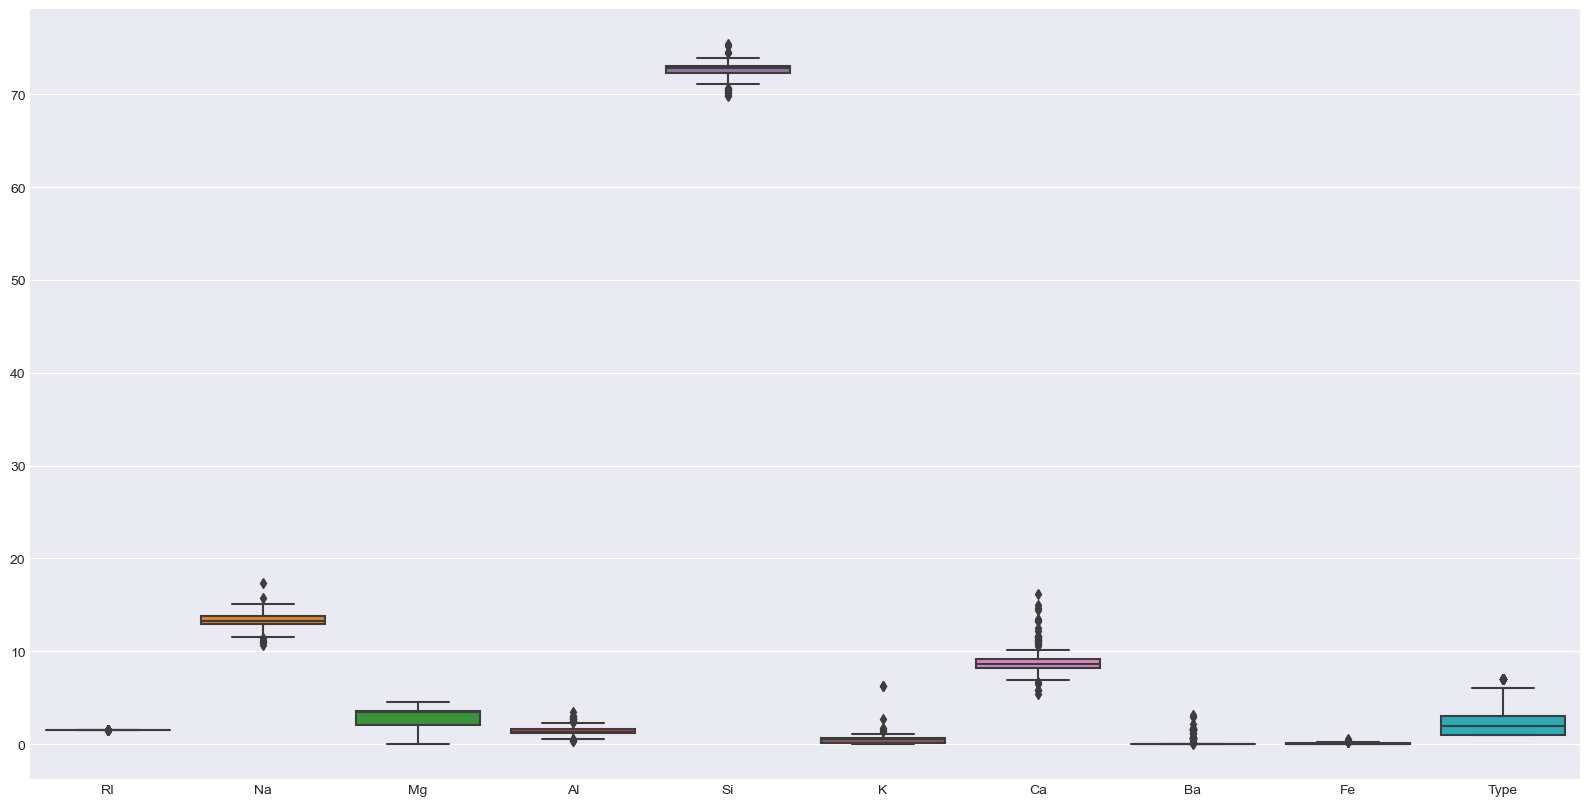

In [171]:
plt.figure(figsize=(20,10))
sns.boxplot(data= df)

In [172]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


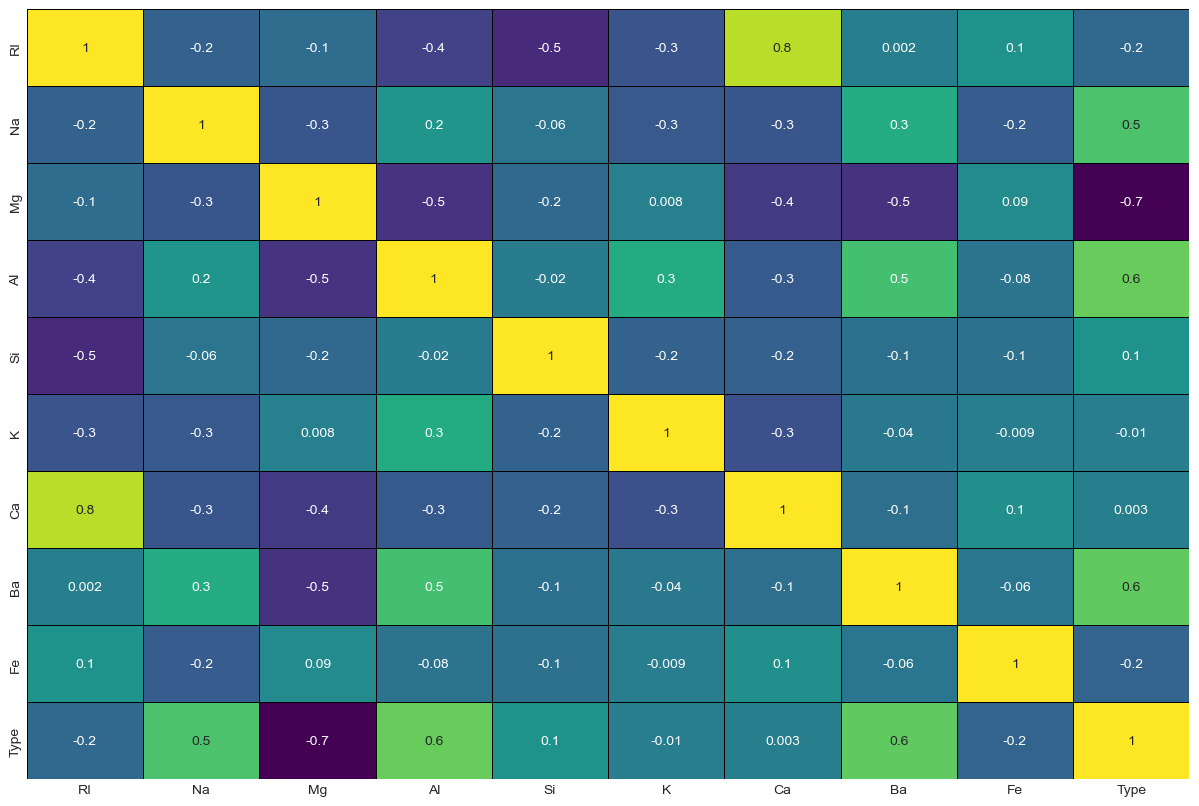

In [173]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black');

In [114]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [115]:
array=df.values

In [116]:
array

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [128]:
X =array[:,0:-1]
Y =array[:,-1]

In [129]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [130]:
pd.DataFrame(Y)

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
208,7.0
209,7.0
210,7.0
211,7.0


In [131]:
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
X

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [132]:
# Our data is imbalenced so we have to scale the features using Standard Scaler

# Building our Model

## Train Test Split

In [133]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=12)

In [134]:
X.shape

(213, 9)

In [135]:
Y.shape

(213,)

In [136]:
from sklearn.metrics import accuracy_score

## Training and Testing

### For K=3

In [137]:
knn_c=KNeighborsClassifier(n_neighbors=3)
knn_c.fit(X_train,Y_train)
Y_pred=knn_c.predict(X_test)

In [138]:
print("accuracy_score:", accuracy_score(Y_test,Y_pred))

accuracy_score: 0.7209302325581395


### For K=5

In [139]:
knn_c=KNeighborsClassifier(n_neighbors=5)
knn_c.fit(X_train,Y_train)
Y_pred=knn_c.predict(X_test)

In [140]:
print("accuracy_score:", accuracy_score(Y_test,Y_pred))

accuracy_score: 0.6976744186046512


### For K=7

In [141]:
knn_c=KNeighborsClassifier(n_neighbors=5)
knn_c.fit(X_train,Y_train)
Y_pred=knn_c.predict(X_test)

In [142]:
print("accuracy_score:", accuracy_score(Y_test,Y_pred))

accuracy_score: 0.6976744186046512


### We are selectiong the best K Value

In [155]:
score=[]
k_range=(i*2+1 for i in range(1,20,2))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X , Y, cv=10)
    score.append(scores.mean())
    
score

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.6430735930735931,
 0.6287878787878789,
 0.5870129870129869,
 0.5774891774891776,
 0.5965367965367966,
 0.6201298701298702,
 0.6106060606060606,
 0.6010822510822511,
 0.577922077922078,
 0.5880952380952381]

### Plotting K Values and average acuuracy score

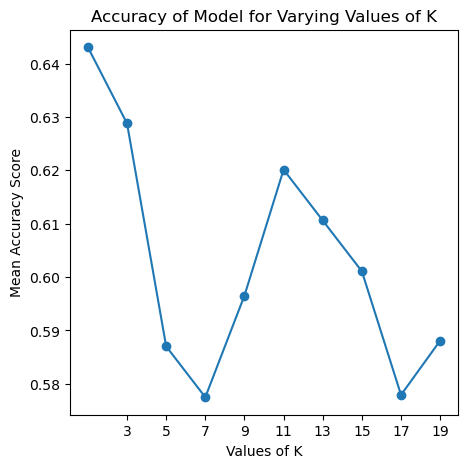

In [157]:
plt.plot(range(1,20,2),score, marker='o')
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(range(3,20,2))
plt.rcParams['figure.figsize'] = (5,5) 
plt.show()

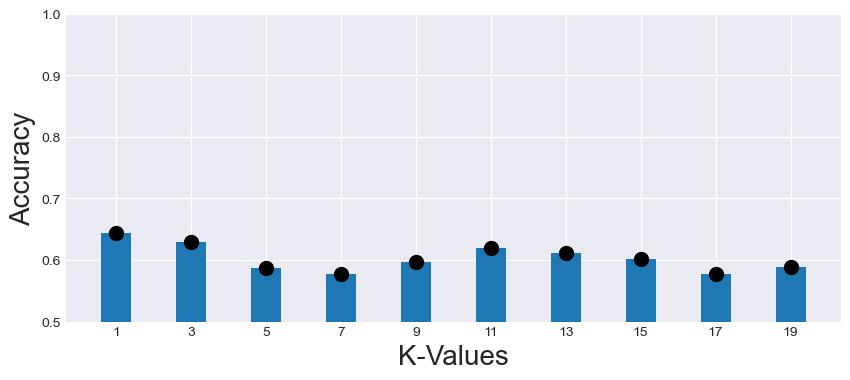

In [163]:
plt.figure(figsize=(10,4))
plt.bar(range(1,20,2),score)
plt.xticks(range(1,20,2))
plt.xlabel("K-Values",size=20)
plt.ylabel("Accuracy",size=20)
plt.ylim(0.5,1)
plt.style.use("seaborn-darkgrid")
plt.scatter(range(1,20,2),score,s=100,color="Black")
plt.show()

In [158]:
score.index(max(score))

0

In [159]:
max(score)

0.6430735930735931

# Cross Validation

In [165]:
from sklearn.model_selection import cross_val_score

In [166]:
scores=[]

for i in range(1,20,2):
    model=KNeighborsClassifier(i)
    score=cross_val_score(model,X_train,Y_train,cv=10)
    scores.append(score.mean())

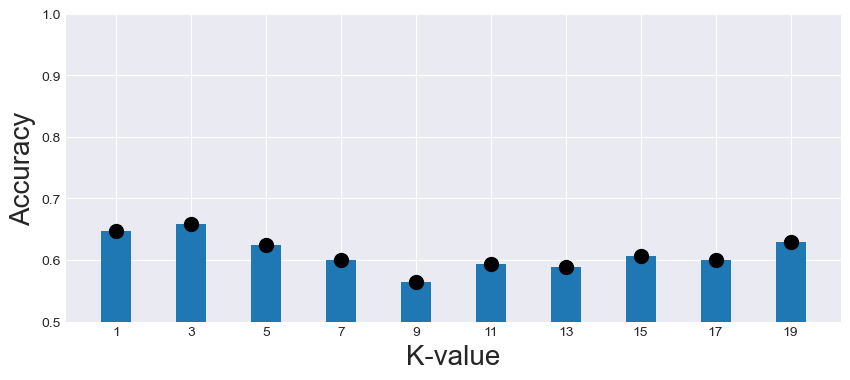

In [167]:
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.bar(range(1,20,2),scores)
plt.xticks(range(1,20,2))
plt.xlabel("K-value",size=20)
plt.ylabel("Accuracy",size=20)
plt.ylim(0.5,1)
plt.scatter(range(1,20,2),scores,s=100,color="Black")
plt.show()

# Final Model

### Our best K Value is 3

In [169]:
final_model=KNeighborsClassifier(3)
final_model.fit(X_train,Y_train)
pred=final_model.predict(X_test)
accuracy_score(Y_test,pred)

0.7209302325581395

In [170]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         1.0       0.63      1.00      0.77        12
         2.0       0.82      0.60      0.69        15
         3.0       0.00      0.00      0.00         2
         5.0       0.33      0.50      0.40         2
         6.0       1.00      0.25      0.40         4
         7.0       0.78      0.88      0.82         8

    accuracy                           0.70        43
   macro avg       0.59      0.54      0.52        43
weighted avg       0.71      0.70      0.67        43

